In [1]:
import pandas as pd
orders = pd.read_table("http://bit.ly/movieusers")
print("Overview of dataframe")
print(orders.head())
print("Shape: ",orders.shape)
user_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_table("http://bit.ly/movieusers",sep='|', header=None, names=user_cols)
print("Dataframe after modifying the default parameter values for read_table:")
print(users.head())

Overview of dataframe
   1|24|M|technician|85711
0       2|53|F|other|94043
1      3|23|M|writer|32067
2  4|24|M|technician|43537
3       5|33|F|other|15213
4   6|42|M|executive|98101
Shape:  (942, 1)
Dataframe after modifying the default parameter values for read_table:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [7]:
ufo = pd.read_csv("http://bit.ly/uforeports")
print("Overview of UFO data reports:")
print(ufo.head())
#series
print("City series(sorted):")
print(ufo.City.sort_values())
ufo['Location']=ufo.City + ',' + ufo.State
print("After creating a new 'Location' series:")
print(ufo.head())
print("\nCalculate summary statistics:")
print(ufo.describe())
print("\nColumn names of ufo dataframe:\n", ufo.columns)
#rename two of the columns by using the 'rename' method 
ufo.rename(columns={'Colors Reported':'Colors_Reported','Shape Reported':'Shape_Reported'},inplace=True)
print("\nColumn name of ufo dataframe after renaming two column names:\n",ufo.columns)
#rename multiple columns at once
ufo.drop(['City','State'], axis=1, inplace=True)
print("\nColumn name of ufo dataframe after removing two columns(city,state):\n",ufo.columns)
#remove multiple rows at once(axis=0 refers to rows)
ufo.drop([0,1], axis=0, inplace=True)
print("\nufo dataframe after deleting first two rows:\n",ufo.head())


Overview of UFO data reports:
                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00
City series(sorted):
1761     Abbeville
17809     Aberdeen
2297      Aberdeen
9404      Aberdeen
389       Aberdeen
           ...    
12441          NaN
15767          NaN
15812          NaN
16054          NaN
16608          NaN
Name: City, Length: 18241, dtype: object
After creating a new 'Location' series:
                   City Colors Reported Shape Reported State             Time  \
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00   
1           Willingboro      

In [5]:
#read a dataset of top-rated IMDb movies into a dataframe
movies = pd.read_csv('http://bit.ly/imdbratings')
print("Dataframe of top-rated IMDb movies:")
print(movies.head())
print("\nDifferent ways to filter rows of a pandas Dataframe by column value:")
print("Example: Filter rows to only show movies with a duration of atleast 200 minutes")
print("1.Using for loop:-")
#create a list in which elements refers to a dataframe row: True if the row satisfies the condition, False otherwise
booleans = []
for length in  movies.duration:
    if length>=200:
        booleans.append(True)
    else:
        booleans.append(False)
is_long = pd.Series(booleans)
print(is_long.head())
print("2.Broadcasting:-")
print(movies[movies.duration>=200])
print("3.Using loc method:-")
print(movies.loc[movies.duration>=200])

Dataframe of top-rated IMDb movies:
   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  

Different ways to filter rows of a pandas Dataframe by column value:
Example: Filter rows to only show movies with a duration of atleast 200 minutes
1.Using for loop:-
0 

In [9]:
#read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
print("Dataframe:")
print(orders.head())
print("\nString methods in pandas:-")
print("\nitem_name series(in uppercase):")
print(orders.item_name.str.upper().head())
print("\nCheck for a substring'Chicken' in the given dataframe:")
print(orders[orders.item_name.str.contains('Chicken')].head())
print()
#many pandas string methods support regular expressions(regex)
print("replace []")
print(orders.choice_description.str.replace(r"[\[\]]",'',regex=True).head())
print()
print("Examine the data type of each Series:")
print(orders.dtypes)
print()
print("Dataframe after replacing 'S' and converting string to float of 'item_price' series:")
print(orders.item_price.str.replace('$',"").astype(float))

Dataframe:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   

String methods in pandas:-

item_name series(in uppercase):
0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOM

Dataframe:
Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

Mean beer servings across the entire dataset: 106.16062176165804
Mean beer servings just for countries in Africa: 61.471698113207545

Aggregate functions used with groupby:

Mean beer servings for each continent: continent
Africa          61.471698113207545
Asia             37.04545454545455
Europe          193.77777777777777
North America   145.43478260869566
Oceania                    89.6875
South America   175.08333333333334
Name: beer_servings, dtype: float64
Maximum beer servings for each continent: continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64
Multiple aggregation functions can be applied simultaneously:
               count               mean  min  max
continent                                        

<Axes: xlabel='continent'>

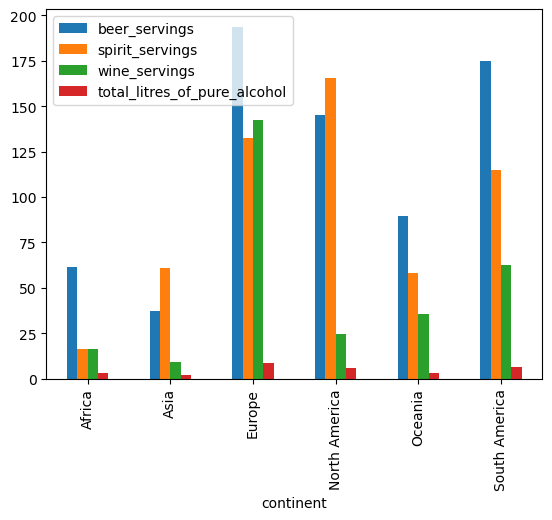

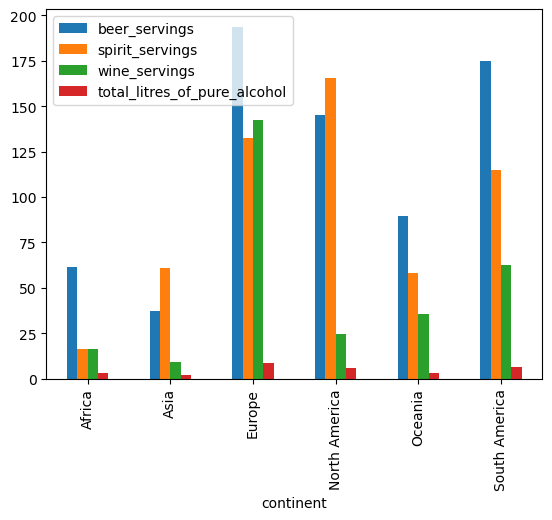

In [76]:
#read a dataset of Chipotle orders into a DataFrame
drinks = pd.read_table('http://bit.ly/drinksbycountry',sep=',')
print("Dataframe:")
print(drinks.columns)
print()
print("Mean beer servings across the entire dataset:",drinks.beer_servings.mean())
print("Mean beer servings just for countries in Africa:",drinks[drinks.continent=='Africa'].beer_servings.mean())
print()
print("Aggregate functions used with groupby:")
print()
print("Mean beer servings for each continent:",drinks.groupby('continent').beer_servings.mean())
print("Maximum beer servings for each continent:",drinks.groupby('continent').beer_servings.max())
print("Multiple aggregation functions can be applied simultaneously:")
print(drinks.groupby('continent').beer_servings.agg(['count','mean','min','max']))
#specifying a column to which the aggregation function should be applied is not required 
drinks.groupby('continent').mean(numeric_only=True)
#allow plots to appear in the notebook
%matplotlib inline
#side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean(numeric_only=True).plot(kind='bar')
drinks.groupby('continent').mean(numeric_only=True).plot(kind='bar')

In [45]:
ufo = pd.read_csv('http://bit.ly/uforeports')
print(ufo.isnull().tail())
print(ufo.notnull().tail())
print(ufo.isnull().sum())
print(ufo.shape)
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
print(ufo.dropna(how='all').shape)
print(ufo.dropna (subset=['City', 'Shape Reported'], how='any').shape) 
print(ufo['Shape Reported'].value_counts().head())
#fll in missing values with a specifed value
print(ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True))
# confrm that the missing values were flled in
print(ufo['Shape Reported'].value_counts().head())
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
print(drinks.head())
# every DataFrame has an index (sometimes called the "row labels") 
print(drinks.index)
# index and columns both default to integers if you don't defne them 
print(pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head())
# identifcation: index remains with each row when fltering the DataFrame
print(drinks [drinks.continent== 'South America'])
# selection: select a portion of the DataFrame using the index 
print(drinks.loc[23,'beer_servings'])

# set an existing column as the index 
print(drinks.set_index('country', inplace=True))
print(drinks.head())
# you can interact with any DataFrame using its index and columns
print(drinks.describe().loc['25%', 'beer_servings'])
# access the Series index
print(drinks.continent.value_counts().index)
# access the Series values
print(drinks.continent.value_counts().values)
# any Series can be sorted by its values
print(drinks.continent.value_counts().sort_values())
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
# concatenate the 'drinks' DataFrame with the 'population' Series (aligns by the index)
print(pd.concat([drinks, people], axis=1).head())

        City  Colors Reported  Shape Reported  State   Time
18236  False             True           False  False  False
18237  False             True           False  False  False
18238  False             True            True  False  False
18239  False            False           False  False  False
18240  False             True           False  False  False
       City  Colors Reported  Shape Reported  State  Time
18236  True            False            True   True  True
18237  True            False            True   True  True
18238  True            False           False   True  True
18239  True             True            True   True  True
18240  True            False            True   True  True
City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64
(18241, 5)
(18241, 5)
(15575, 5)
Shape Reported
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: count, dtype: i

/tmp/ipykernel_2595/3757406462.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True))


       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  
RangeIndex(start=0, stop=193, step=1)
   0   1  2           3      4
0  1  24  M  technician  85711
1  2  53  F       other  94043
2  3  23  M      writer  32067
3  4  24  M  technician  43537
4  5  33  F       other  15213
       country  beer_servings  spirit_servings  wine_servings  \
6    Argentina            193               25          

In [49]:
ufo = pd.read_csv('http://bit.ly/uforeports')
print("Dataframe: ")
print(ufo.head(3))
print()
print("Selecting multiple rows and columns from a pandas Data Frame using 'loc': ") 
print()
#loc method is used to select rows and columns by label
print("First row, all columns: ")
print(ufo.loc[0, :])
print()
print("First 3 rows, all columns: ")
print(ufo.loc[[0, 1, 2], :])
print()
#rows 0 through 2 (inclusive), all columns
print(ufo.loc[0:2, :])
print()
#this implies "all columns", but explicitly stating "all columns" is better
print(ufo.loc[0:2])
print()
print("First 3 rows, only one column 'City': ")
print(ufo.loc[0:2, 'City'])
print()
print("First 3 rows, two columns 'City' and 'State': ")
print(ufo.loc[0:2, ['City', 'State']])
print()
print("Accomplish the same thing using double brackets: ")
#using 'loc' is preferred since it's more explicit
print(ufo[['City', 'State']].head(3))
print()
print("First 3 rows, columns 'City' through 'State': ") 
print(ufo.loc[0:2, 'City':'State'])
print()
print("Accomplish the same thing using 'head' and 'drop': ") 
print(ufo.head(3).drop('Time', axis=1))
print()
print("Rows in which the 'City' is 'Oakland', column 'State': ") 
print(ufo.loc[ufo.City=='Oakland','State'])
print()
print("Accomplish the same thing using 'chained indexing':")
#using 'loc' is preferred since chained indexing can cause problems
print(ufo[ufo.City=='Oakland'].State)
print()
print("Selecting multiple rows and columns from a pandas DataFrame using 'iloc': ")
print()
print("Rows in positions 0 and 1, columns in positions 0 and 3: ")
print(ufo.iloc[[0, 1], [0,3]])
print()
print("Rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive): ")
print(ufo.iloc[0:2, 0:4])
print()
print("Rows in positions 0 through 2 (exclusive), all columns: ")
print(ufo.iloc[0:2, :])

Dataframe: 
          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

Selecting multiple rows and columns from a pandas Data Frame using 'loc': 

First row, all columns: 
City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

First 3 rows, all columns: 
          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIAN

In [55]:
print("Creating dummy variables in pandas: ")
print()
# read the training dataset from Kaggle's Titanic competition 
train = pd.read_csv('http://bit.ly/kaggletrain')
print("Dataframe: ")
print(train.head())
print()
#use 'get_dummies' to create one column for every possible value 
print(pd.get_dummies(train.Sex).head())
print()
# drop the frst dummy variable ('female') using the 'iloc' method
print(pd.get_dummies(train.Sex).iloc[:, 1:].head())
print()
# add a prefx to identify the source of the dummy variables 
print(pd.get_dummies(train.Sex,prefix='Sex').iloc[:, 1:].head())
print()
# use 'get_dummies' with a feature that has 3 possible values
print(pd.get_dummies(train.Embarked, prefix='Embarked').head(10))
print()
# drop the frst dummy variable ('C')
print(pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:].head(10))
print()
#0, 0 means C 1, 0 means Q 0, 1 means S
#reset the DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain') 
print("Dataframe: ") 
print(train.head()) 
print()
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
print(pd.get_dummies(train, columns=['Sex', 'Embarked']).head())
print()
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
print(pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head())

Creating dummy variables in pandas: 

Dataframe: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

In [58]:
import numpy as np
# create a DataFrame from a dictionary (keys become column names, values become data)
#optionally specify the order of columns and defne the index
df = pd.DataFrame({'id':[100, 101, 102], 'color': ['red', 'blue', 'red']}, columns=['id', 'color'], index=['a','b', 'c'])
print("DataFrame from a dictionary:")
print(df)
print()
# create a DataFrame from a list of lists (each inner list becomes a row)16 29 29
print("DataFrame from a list of lists: ")
print(pd.DataFrame([[100, 'red'], [101, 'blue'], [102, 'red']], columns=['id', 'color']))
print()
# create a NumPy array (with shape 4 by 2) and fll it with random numbers between0&1 
arr = np.random.rand(4, 2)
print("Numpy array: ")

print(arr)
print()
print("DataFrame from the above defned NumPy array: ")
print(pd.DataFrame(arr, columns=['one', 'two']))
print()
print("DataFrame of student IDs (100 through 109) and test scores (random integers between 60 and 100: ")
print(pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)})) 
print()
#'set_index' can be chained with the DataFrame constructor to select an index
print(pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60,101,10)}).set_index('student'))
print()
# create a new Series using the Series constructor
s = pd.Series(['round', 'square'], index=['c', 'b'], name='shape')
print(s)
print()
# concatenate the DataFrame and the Series (use axis=1 to concatenate columns)
print(pd.concat([df, s], axis=1))

DataFrame from a dictionary:
    id color
a  100   red
b  101  blue
c  102   red

DataFrame from a list of lists: 
    id color
0  100   red
1  101  blue
2  102   red

Numpy array: 
[[0.66738598 0.09491928]
 [0.55293294 0.22016802]
 [0.96767014 0.00565765]
 [0.08032915 0.83041176]]

DataFrame from the above defned NumPy array: 
        one       two
0  0.667386  0.094919
1  0.552933  0.220168
2  0.967670  0.005658
3  0.080329  0.830412

DataFrame of student IDs (100 through 109) and test scores (random integers between 60 and 100: 
   student  test
0      100    82
1      101    96
2      102    80
3      103    78
4      104    67
5      105    67
6      106    99
7      107    62
8      108    97
9      109    74

         test
student      
100        62
101        78
102        84
103        61
104        90
105        69
106        91
107        80
108        90
109        67

c     round
b    square
Name: shape, dtype: object

    id color   shape
a  100   red     NaN
b  101  blu

In [67]:
#change display options in pandas
# read a dataset of alcohol consumption into a DataFrame 
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
print("Shape:",drinks.shape)
print()
# check the current setting for the 'max_rows' option 
pd.get_option('display.max_rows')
print(drinks)
print()
#overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows',2)
print(drinks)
print()
# reset the 'max_rows' option to its default 
pd.reset_option("display.max_rows")
print(drinks)
print()
# add two meaningless columns to the drinks DataFrame
drinks['x'] = drinks.wine_servings*1000
drinks['y'] = drinks.total_litres_of_pure_alcohol* 1000 
print(drinks.head())
print()
# use a Python format string to specify a comma as the thousands separator
pd.set_option("display.float_format", "{:}".format)
print(drinks.head())
print()
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv("http://bit.ly/kaggletrain")
# an ellipsis is displayed in the 'Name' cell of row 1 because of the 'max_colwidth' option
pd.get_option("display.max_colwidth")
print(train.head())
print()
#overwrite the current setting so that more characters will be displayed
pd.set_option('display.max_colwidth', 1000)
print(train.head())
print()

Shape: (193, 6)

         country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol      continent  
0                             0.0           Asia  
1                             4.9         Europe  
2                        

In [72]:
# read a dataset of UFO reports into a DataFrame 
print("Inplace parameter in pandas: ")
print()
ufo = pd.read_csv('http://bit.ly/uforeports') 
print("Dataframe: ") 
print(ufo.head())
print("Shape:",ufo.shape)
print()
# remove the 'City' column (doesn't affect the DataFrame since inplace=False) 
ufo.drop('City',axis=1)
# confrm that the 'City' column was not actually removed
print(ufo.columns)
print()
# remove the 'City' column (does affect the DataFrame since inplace=True) 
ufo.drop('City',axis=1, inplace=True)
# confrm that the 'City' column was actually removed
print(ufo.columns)
print()
print(ufo.shape)
print()
#drop a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any')
# confrm that no rows were actually removed
print(ufo.shape)
print()
print("Using an assignment statement instead of the 'inplace' parameter: ")
ufo = ufo.set_index('Time')
print(ufo.tail(3))
print()
print("Fill missing values using 'backward fill' strategy: ")
# doesn't affect the DataFrame since inplace=False
print(ufo.fillna(method='bfill').tail(3))
print()
print("Dataframe: ")
print(ufo.tail(3))
print()
print("Fill missing values using 'forward fill' strategy: ") 
#doesn't affect the DataFrame since inplace=False
print(ufo.fillna(method='ffill').tail(3))
print()
print("Dataframe: ")
print(ufo.tail(3))

Inplace parameter in pandas: 

Dataframe: 
                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00
Shape: (18241, 5)

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

Index(['Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

(18241, 4)

(18241, 4)

Using an assignment statement instead of the 'inplace' parameter: 
                 Colors Reported Shape Reported State
Time                                                 
12/31/2000 23:45             NaN            NaN    WI
12/31/2000 23:45             RED          LIGHT    

/tmp/ipykernel_2595/693286332.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(ufo.fillna(method='bfill').tail(3))
/tmp/ipykernel_2595/693286332.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(ufo.fillna(method='ffill').tail(3))
